<a href="https://colab.research.google.com/github/cybermin/pythonbasic/blob/master/work/04/ex15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
from urllib.request import urlopen
from urllib import parse

In [ ]:
mykey = '8888457327677944494'
myquery = parse.quote("한국의 가을은 매우 아름답습니다")
mytype = 0 

url = 'http://api.adams.ai/datamixiApi/omAnalysis?key=' + mykey +'&query=' + myquery +'&type=' + str(mytype )
data = urlopen(url)

In [ ]:
import json
def adamsAi(myquery, mytype) :
    mykey = '8888457327677944494'

    url = 'http://api.adams.ai/datamixiApi/omAnalysis?key=' + mykey 
    url = url +'&query=' + parse.quote(myquery )
    url = url +'&type=' + mytype    
  
    data = urlopen(url).read().decode('utf-8')
    dt = json.loads(data)

    if mytype == '0' :
        score = dt["return_object"]["score"]
        label = dt["return_object"]["label"]
    else :
        score = dt["return_object"]["Result"][0][0] 
        label = dt["return_object"]["Result"][0][1] 
        
    return score, label

In [ ]:
myquery = input('문장을 입력하세요.')
mytype = input('0:감성분석, 1:감정분석')
 
score, label = adamsAi(myquery,mytype )
print(f'{myquery} : {mytype} {label} {score}')

문장을 입력하세요.오늘도 즐거운 하루
0:감성분석, 1:감정분석0
오늘도 즐거운 하루 : 0 긍정 1.0


In [ ]:
rt = {'부정':0, '중립':0, '긍정':0}

with open('/content/drive/My Drive/PythonWork/PythonBasic/work/04/평점.txt','r', encoding='utf-8') as fp:
    data = fp.readlines()

for line in data:
    line = line.replace("\n", '')
    item = line.split('\t')
    score, label = adamsAi(item[1],'0' ) #감성분석만
    rt[label] = rt[label] + 1
    print(item[1], '=>', label)
print(rt)

박성웅이 제일 잘했는듯 ㅋ 신고 => 긍정
박성웅의차분한발성넘나멋있음?  => 긍정
서지도 않는 아재들이랑 현학적 허세로 가득한 평론가랑 네이버 방구석 철학자들이 빨아서 닳아버린 대부보다 훨 재밌음  => 긍정
딜레마의 끝은, 대개 <둘 중 어느 한 편도 지켜내지 못함>. 더욱이, 어찌하여, 나 홀로 살아남음.이 <살아남은 자의 비참함>에 관한 경위서.  => 부정
재미는 확실하군 황정미니 살아있네  => 긍정
OO 브라다의 의리 멋있다! 황정민 대박  => 긍정
노래부터 배우연기까지 빠짐이없음  => 중립
몇번을 다시봐도 소름이 돋는다.에필로그까지 완벽한 영화 => 긍정
이건 인간적으로 10점 아니냐  => 부정
너 나 감당 할수 있겠냐~  => 부정
{'부정': 3, '중립': 1, '긍정': 6}


In [ ]:
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

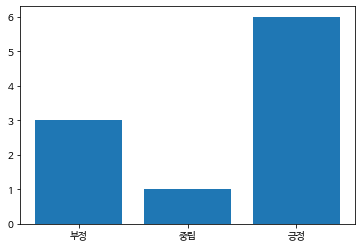

In [ ]:
x = list(rt.keys())
y = list(rt.values())
plt.bar(x,y )
plt.show()

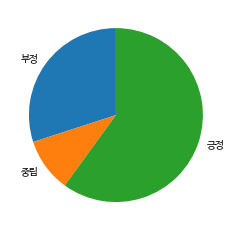

In [ ]:
plt.pie(y, labels=x, startangle=90)
plt.show()

In [ ]:
dt = {'a':10, 'b':20}

print(dt.get('c'))
print(dt['c'])

None


KeyError: ignored